<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Projeto**: Previsão de renda

**Autor:** Júlia Caroline Araújo da Silva<br>
**Data de entrega:** 16 de outubro de 2024<br>
**Última atualização:** 16 de março de 2025


---

## Índice

- [Etapa 1 CRISP-DM: Entendimento do negócio](#1)
- [Etapa 2 Crisp-DM: Entendimento dos dados](#2)
- [Etapa 3 Crisp-DM: Preparação dos dados](#3)
    > - [Import das bibliotecas/pacotes](#import)
    > - [Análise Descritiva](#leitura)
    >> - [Análise Univariada](#univariada)
    >> - [Análise Bivariada](#bivariada)
- [Etapa 4 Crisp-DM: Modelagem](#4)
- [Etapa 5 Crisp-DM: Avaliação dos resultados](#5)
- [Etapa 6 Crisp-DM: Implantação](#6)

## Etapa 1 CRISP - DM: Entendimento do negócio


A análise para a concessão de cartões de crédito é um assunto de extrema importância no setor financeiro. Para que o limite de crédito seja liberado, o banco ou algum outro tipo de industria financeira, utilizam informações pessoais e dados fornecidos pelos candidato para prever a probabilidade de inadimplência futura e comportamento de endividamento com o cartão.

**O objetivo será construir o melhor modelo preditivo para identificar o perfil de renda do cliente**, e assim tentar prever a renda de novos clientes.

## Etapa 2 Crisp-DM: Entendimento dos dados

Abaixo está um resumo das variáveis principais e suas descrições:

| Variável                      | Descrição                                                    | Tipo    |
|:-----------------------------:|:------------------------------------------------------------:|:-------:|
| Unnamed: 0                    | Variável a ser descartada                                    | int64   |
| data_ref                      | Data de Referência (de Jan/2015 até Mar/2016)                | object  |
| id_cliente                    | ID de identificação do Cliente                               | int64   |
| sexo                          | M = 'Masculino'; F = 'Feminino'                              | object  |
| posse_de_veiculo              | Y = 'possui'; N = 'não possui'                               | bool    |
| posse_de_imovel               | Y = 'possui'; N = 'não possui'                               | bool    |
| qtd_filhos                    | Quantidade de Filhos do Cliente                              | int64   |
| tipo_renda                    | Tipo de Renda do Cliente (ex: Assalariado, Empresário, etc.) | object  |
| educacao                      | Nível de Escolaridade (ex: Secundário, Pós Graduação, etc.) | object  |
| estado_civil                  | Estado civil do Cliente (ex: Solteiro, Casado, etc.)         | object  |
| tipo_residencia               | Tipo de Residência do Cliente (ex: Casa, Aluguel, etc.)     | object  |
| idade                         | Idade em Anos do Cliente                                     | int64   |
| tempo_emprego                 | Tempo de Emprego em Anos                                     | float64 |
| qt_pessoas_residencia         | Quantidade de Pessoas na Residência do Cliente               | float64 |
| **renda (Variável Resposta)** | **Renda do Cliente em Reais (*R$*)**                         | **float64** |







## Etapa 3 Crisp-DM: Preparação dos dados

#### Importação das bibliotecas/pacotes

In [ ]:
# Importar os pacotes necessários
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline

In [ ]:
# Carregar o arquivo
df_renda = pd.read_csv('/content/previsao_de_renda.csv')

In [ ]:
# Verificar as primeiras linhas
df_renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [ ]:
# Verificar o formato do dataframe e as informações gerais
df_renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [ ]:
# Obter resumo estatístico das variáveis númericas
df_renda.describe()

,Unnamed: 0,id_cliente,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
count,15000.000000,15000.000000,15000.000000,15000.000000,12427.000000,15000.000000,15000.000000
mean,7499.500000,8304.871400,0.432333,43.882333,7.722635,2.206400,5697.287057
std,4330.271354,4797.780446,0.746631,11.273155,6.711189,0.909792,8266.816289
min,0.000000,1.000000,0.000000,22.000000,0.117808,1.000000,118.710000
25%,3749.750000,4181.000000,0.000000,34.000000,2.973973,2.000000,2026.110000
50%,7499.500000,8297.000000,0.000000,43.000000,6.013699,2.000000,3499.720000
75%,11249.250000,12403.000000,1.000000,53.000000,10.120548,3.000000,6392.167500
max,14999.000000,16649.000000,14.000000,68.000000,42.906849,15.000000,245141.670000


In [ ]:
# Verificar valores ausentes
print(df_renda.isnull().sum())

Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64


In [ ]:
# Excluir linhas com valores ausentes
print(df_renda.dropna().isnull().sum())

Unnamed: 0               0
data_ref                 0
id_cliente               0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64


In [ ]:
# Verificar duplicatas
print(f"Número de duplicatas: {df_renda.duplicated().sum()}")

Número de duplicatas: 0


In [ ]:
# Remover as colunas 'Unnamed: 0' e 'id_cliente'
df_renda.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
# Verificar as colunas do dataframe após a remoção
print(df_renda.columns)

Index(['data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda'],
      dtype='object')


In [ ]:
# Converter a coluna 'data_ref' para o tipo datetime
df_renda['data_ref'] = pd.to_datetime(df_renda['data_ref'])

In [ ]:
# Identificar o tipo da coluna 'data_ref' após a conversão
print(df_renda['data_ref'].dtypes)

datetime64[ns]


### Análise Descritiva

#### 1. Análise Univariada

In [ ]:
# Gerar relatório de análise exploratória de dados (EDA)
prof = ProfileReport(df_renda, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Salvar o relatório de análise exploratória de dados (EDA) em um arquivo HTML
prof.to_file('renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

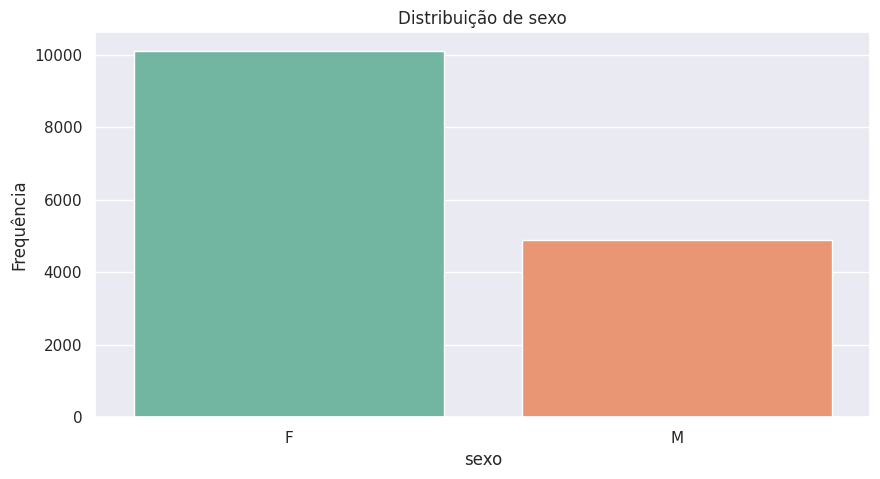

Estatísticas descritivas para sexo:
count     15000
unique        2
top           F
freq      10119
Name: sexo, dtype: object


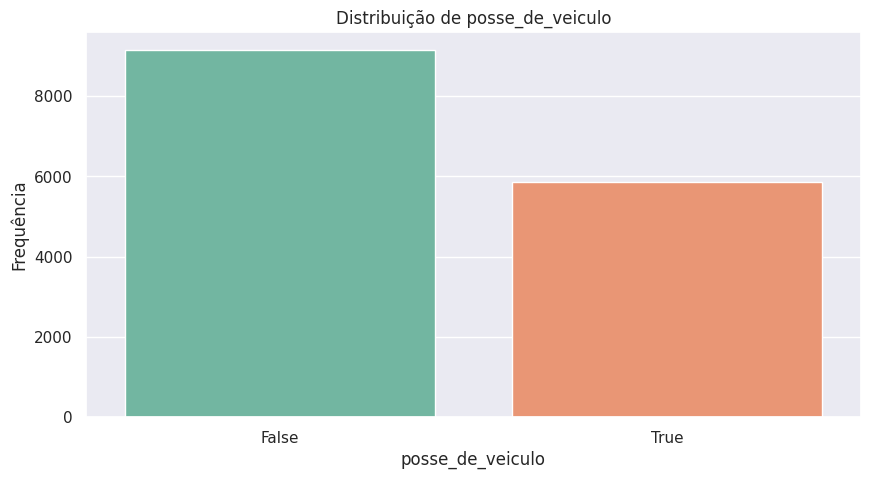

Estatísticas descritivas para posse_de_veiculo:
count     15000
unique        2
top       False
freq       9140
Name: posse_de_veiculo, dtype: object


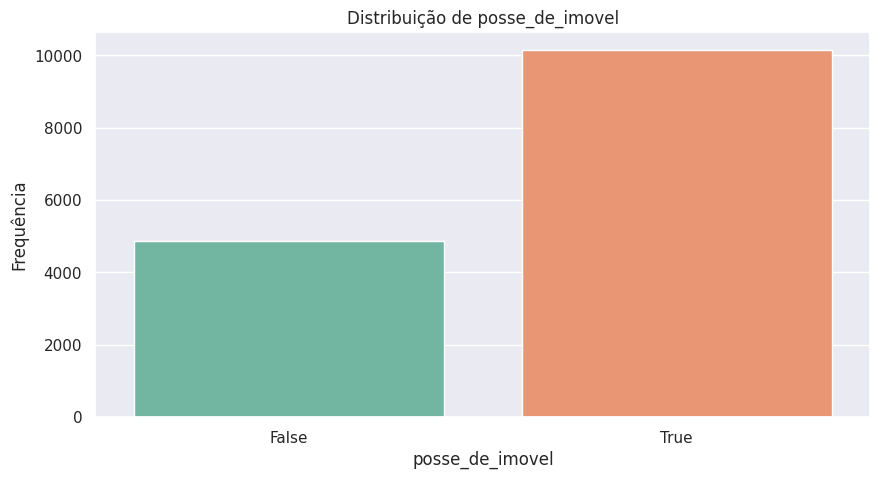

Estatísticas descritivas para posse_de_imovel:
count     15000
unique        2
top        True
freq      10143
Name: posse_de_imovel, dtype: object


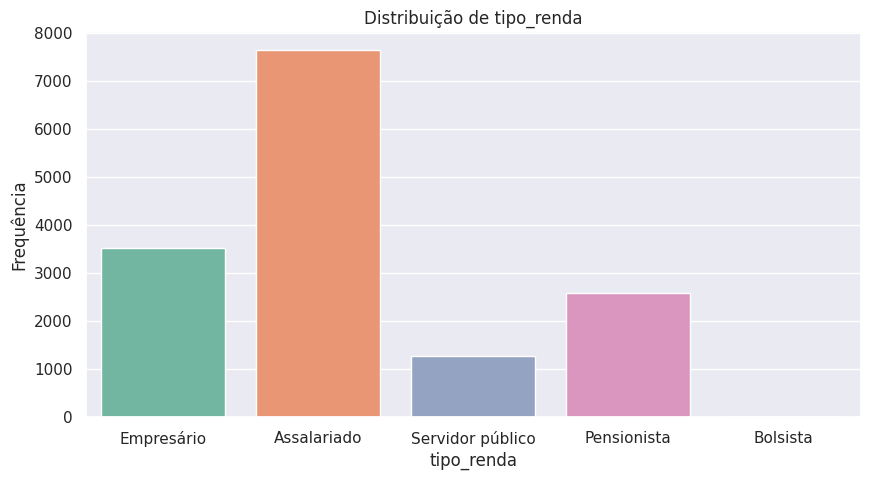

Estatísticas descritivas para tipo_renda:
count           15000
unique              5
top       Assalariado
freq             7633
Name: tipo_renda, dtype: object


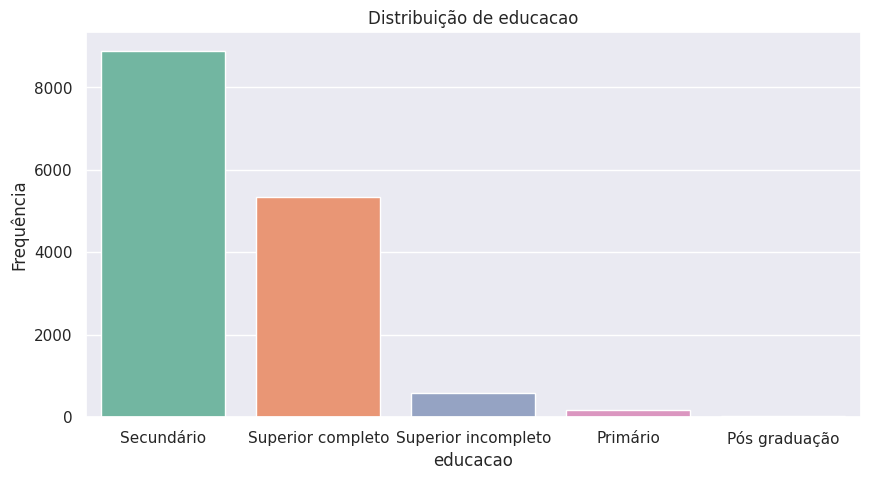

Estatísticas descritivas para educacao:
count          15000
unique             5
top       Secundário
freq            8895
Name: educacao, dtype: object


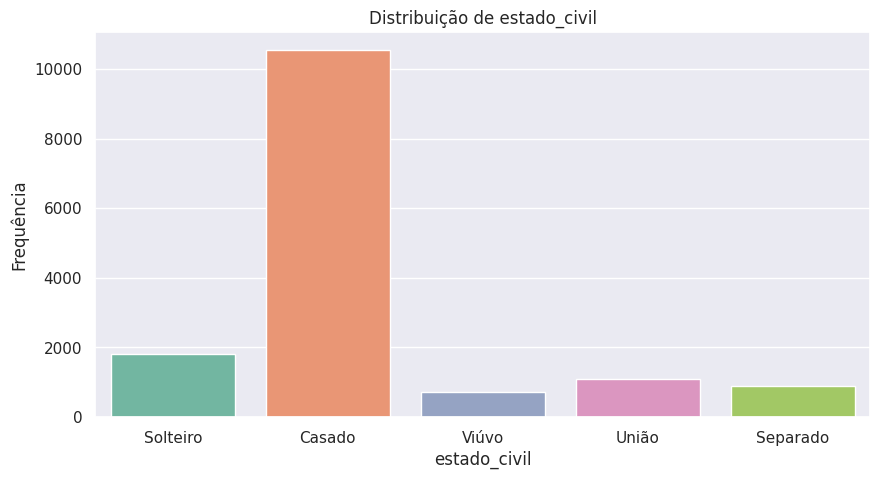

Estatísticas descritivas para estado_civil:
count      15000
unique         5
top       Casado
freq       10534
Name: estado_civil, dtype: object


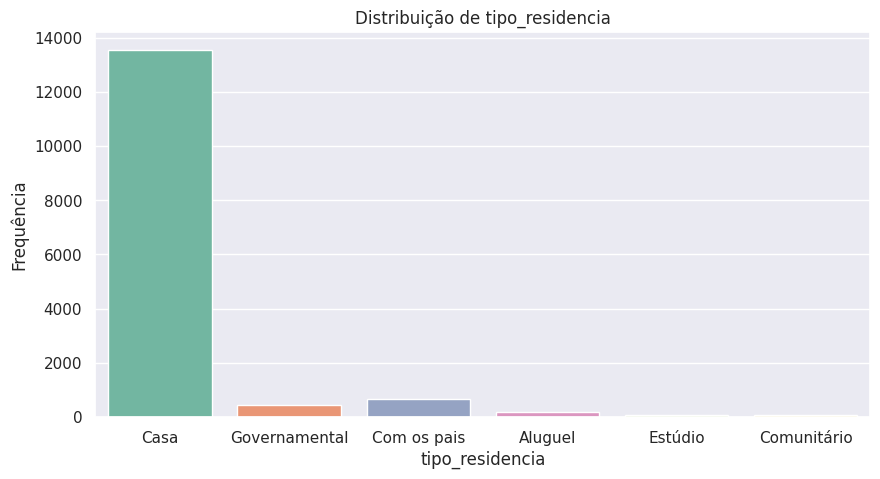

Estatísticas descritivas para tipo_residencia:
count     15000
unique        6
top        Casa
freq      13532
Name: tipo_residencia, dtype: object


In [ ]:
# Estatísticas descritivas das variáveis categóricas e visualização de gráfico de barras
sns.set_theme()

var_categ = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

for var in var_categ:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df_renda[var], hue=df_renda[var], palette='Set2', legend=False)
    plt.title(f'Distribuição de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.show()

    print(f'Estatísticas descritivas para {var}:')
    print(df_renda[var].describe())


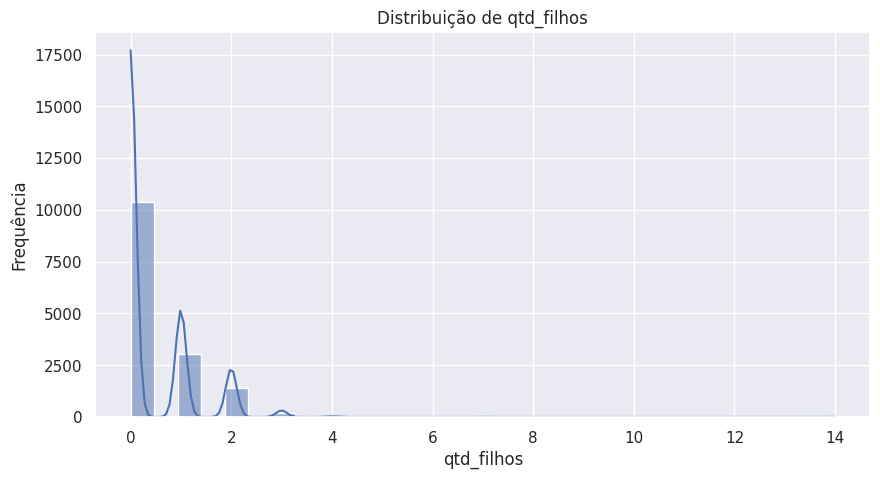

Estatísticas descritivas para qtd_filhos:
count    15000.000000
mean         0.432333
std          0.746631
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         14.000000
Name: qtd_filhos, dtype: float64


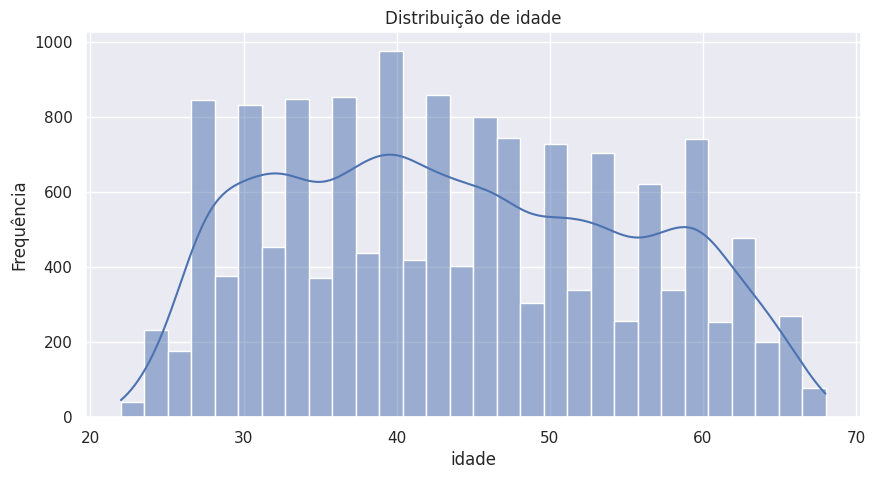

Estatísticas descritivas para idade:
count    15000.000000
mean        43.882333
std         11.273155
min         22.000000
25%         34.000000
50%         43.000000
75%         53.000000
max         68.000000
Name: idade, dtype: float64


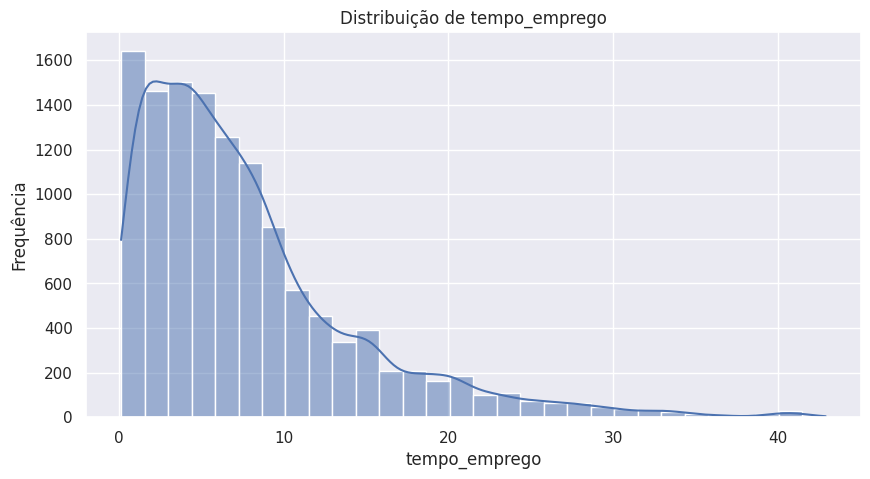

Estatísticas descritivas para tempo_emprego:
count    12427.000000
mean         7.722635
std          6.711189
min          0.117808
25%          2.973973
50%          6.013699
75%         10.120548
max         42.906849
Name: tempo_emprego, dtype: float64


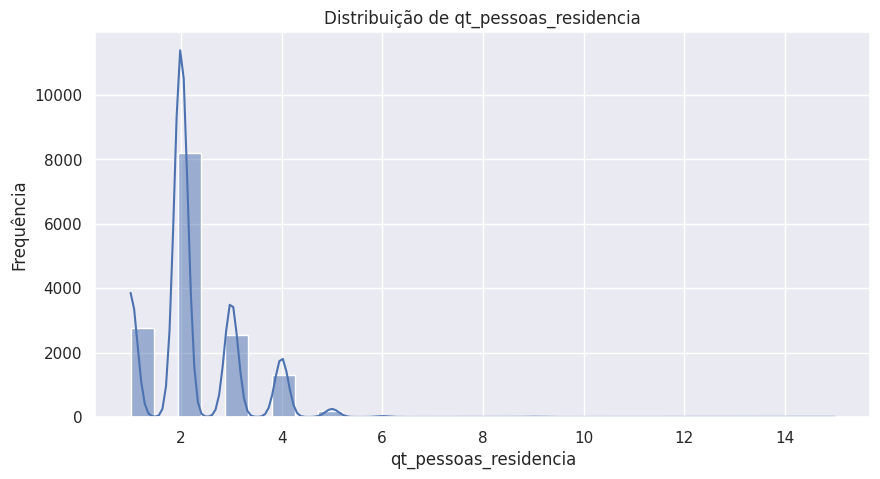

Estatísticas descritivas para qt_pessoas_residencia:
count    15000.000000
mean         2.206400
std          0.909792
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         15.000000
Name: qt_pessoas_residencia, dtype: float64


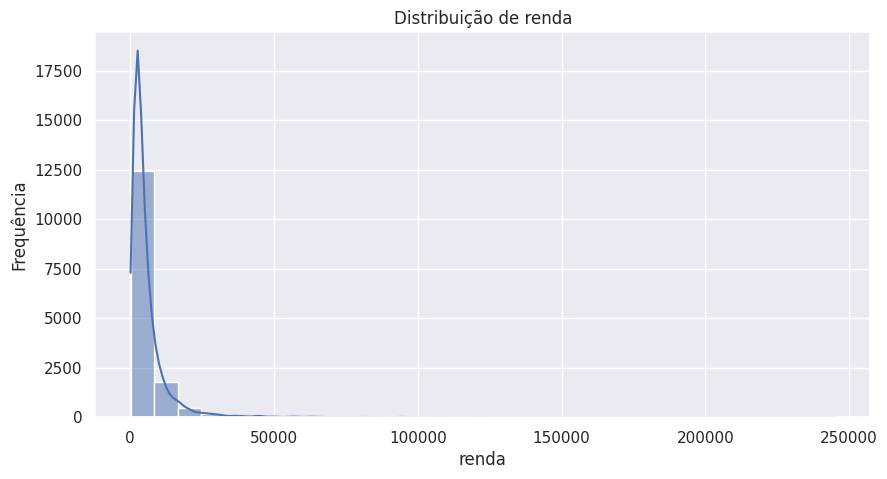

Estatísticas descritivas para renda:
count     15000.000000
mean       5697.287057
std        8266.816289
min         118.710000
25%        2026.110000
50%        3499.720000
75%        6392.167500
max      245141.670000
Name: renda, dtype: float64


In [ ]:
# Estatísticas descritivas das variáveis númericas e visualização de histogramas
sns.set_theme()

var_num = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']

for var in var_num:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_renda[var], kde=True, bins=30)
    plt.title(f'Distribuição de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.show()

    print(f'Estatísticas descritivas para {var}:')
    print(df_renda[var].describe())

### 2. Análise Bivariada




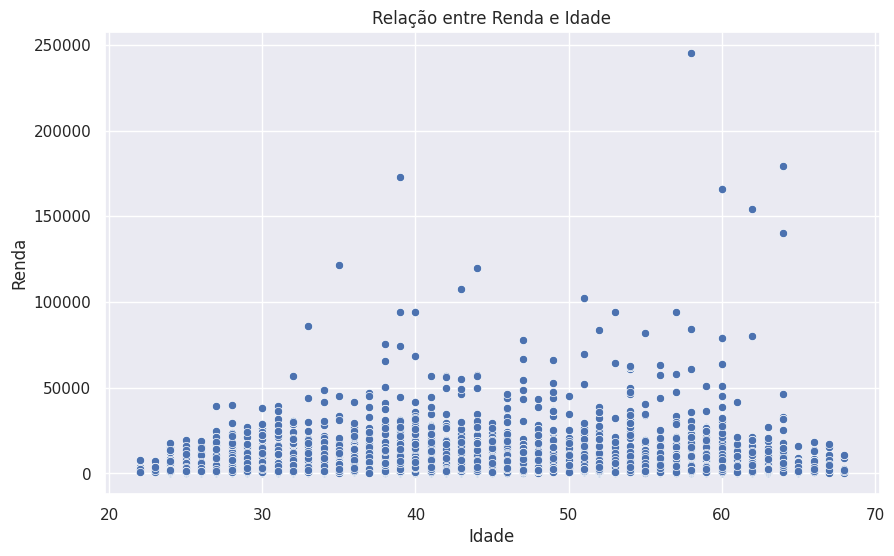

In [ ]:
# Gráfico de dispersão para visualizar a relação entre duas variáveis: idade e renda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='idade', y='renda', data=df_renda)
plt.title('Relação entre Renda e Idade')
plt.xlabel('Idade')
plt.ylabel('Renda')
plt.show()

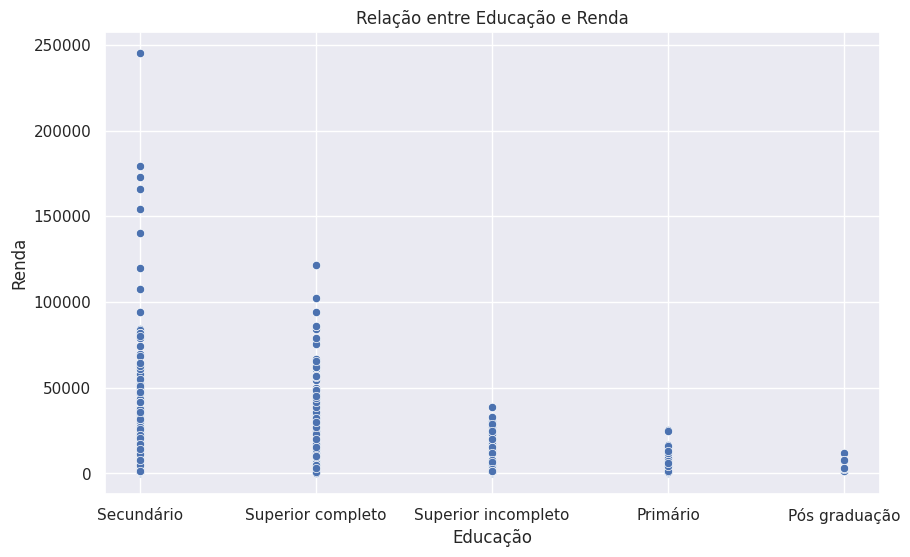

In [ ]:
# Gráfico de dispersão para visualizar a relação entre duas variáveis: educação e renda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='educacao', y='renda', data=df_renda)
plt.title('Relação entre Educação e Renda')
plt.xlabel('Educação')
plt.ylabel('Renda')
plt.show()

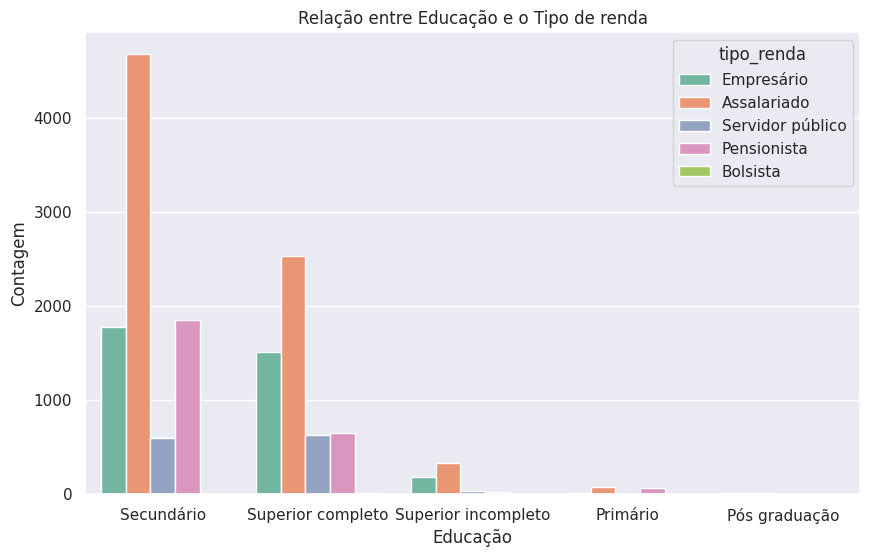

In [ ]:
# Gráfico de barras agrupadas para visualizar a relação entre duas variáveis: educacao e tipo_renda
plt.figure(figsize=(10, 6))
sns.countplot(x='educacao', hue='tipo_renda', data=df_renda, palette='Set2')
plt.title('Relação entre Educação e o Tipo de renda')
plt.xlabel('Educação')
plt.ylabel('Contagem')
plt.show()

In [ ]:
# Criação da coluna 'faixa_etaria'
df_renda['faixa_etaria'] = pd.cut(df_renda['idade'], bins=[0, 18, 35, 50, 100], labels=['Jovem', 'Adulto', 'Meia-idade', 'Idoso'])

In [ ]:
# Extração do ano e mês de 'data_ref'
df_renda['ano'] = df_renda['data_ref'].dt.year
df_renda['mes'] = df_renda['data_ref'].dt.month

In [ ]:
# Normalização da coluna 'renda'
scaler = MinMaxScaler()
df_renda[['renda']] = scaler.fit_transform(df_renda[['renda']])

In [ ]:
# Conversão da coluna 'sexo' para etapa da modelagem
df_renda['sexo'] = df_renda['sexo'].astype('category')

## Etapa 4 Crisp-DM: Modelagem

Utilizaremos a técnica de regressão linear, por se tratar de uma técnica simples, interpretável e eficiente, sendo uma primeira abordagem comum para verificar se há uma relação linear entre as variáveis independentes e a variável alvo.

Antes de rodar o modelo precisamos construir um desenho do teste que será realizado. Para desenvolver um modelo como este, é considerado uma boa prática dividir a base em duas, uma chamada treinamento (80%) e outra chamada teste (20%).

Faremos a avaliação do nosso modelo através de métricas e gráficos usados para verificar se o modelo está bom e se suas previsões são consistentes:
 - MAE (Mean Absolute Error): Mede o erro médio absoluto entre os valores reais e previstos. Indica a magnitude média dos erros.
 - MSE (Mean Squared Error): Penaliza erros grandes mais fortemente que o MAE, sendo útil para destacar previsões fora do padrão.
 - RMSE (Root Mean Squared Error): Facilita a interpretação, já que está na mesma unidade da variável alvo (renda).
 - R² (Coeficiente de Determinação): Mede a proporção da variação da renda explicada pelo modelo. Um valor próximo de 1 indica que o modelo é bom em prever a variável alvo.
 - Valores Reais vs. Previstos: Verifica visualmente se o modelo está fazendo previsões próximas aos valores reais. A linha de referência ajuda a identificar discrepâncias.
 - Distribuição dos Resíduos: Avaliar a distribuição dos erros ajuda a verificar se os resíduos seguem uma distribuição normal (um dos pressupostos da regressão linear).
 - Resíduos vs. Previsões: Um gráfico de resíduos aleatórios em torno da linha zero sugere que o modelo não está enviesado. Se houver padrões nos resíduos, isso pode indicar problemas, como a necessidade de um modelo mais complexo.


In [ ]:
# Separar as variáveis independentes da variável dependente
X = df_renda.drop(['renda', 'data_ref'], axis=1)
y = df_renda['renda']

In [ ]:
# Codificar as variáveis categóricas
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Criar um imputador para preencher valores ausentes com o valor mais frequente em variáveis categóricas
imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
# Ajustar o imputador aos dados de treinamento e transformar os dados de treinamento e teste
X = imputer.fit_transform(X)

In [ ]:
# Divisão dos dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Realizar previsões usando o modelo de machine learning treinado
y_pred = model.predict(X_test)

In [ ]:
# Avaliar o desempenho
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')

MAE: 0.01
MSE: 0.00
RMSE: 0.02
R²: 0.29


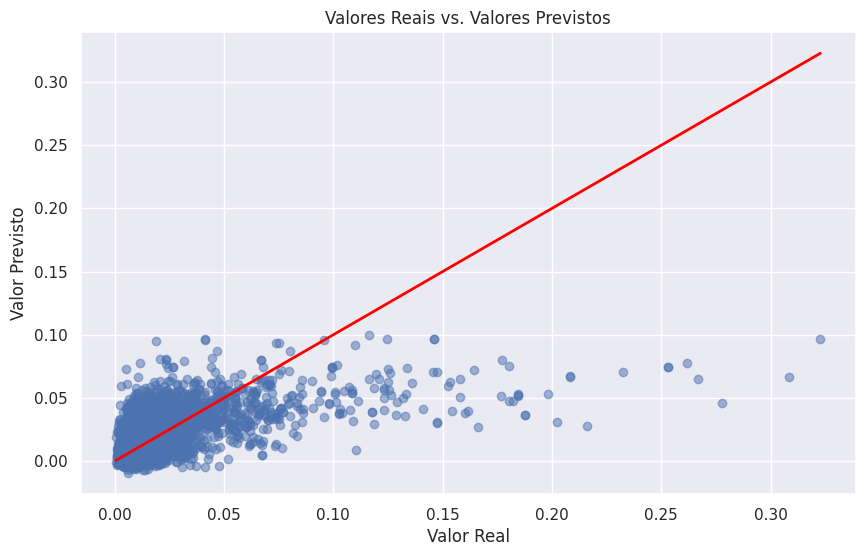

In [ ]:
# Gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('Valores Reais vs. Valores Previstos')
plt.show()

## Etapa 5 Crisp-DM: Avaliação dos resultados

A seguir, temos um histograma da distribuição dos resíduos, indicando que o modelo está se comportando de forma razoável, com resíduos pequenos e centrados próximos de zero, e um gráfico de dispersão que mostra a relação entre os resíduos e os valores previstos, indicando que, embora o modelo funcione bem, ele pode ter dificuldades à medida que os valores previstos aumentam.

In [ ]:
# Calcular os resíduos do modelo
residuos = y_test - y_pred

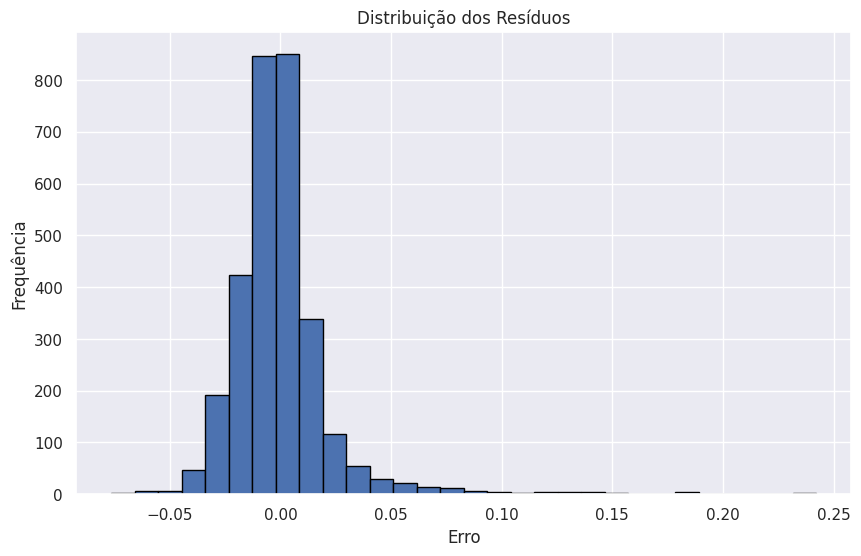

In [ ]:
# Histograma para visualizar a distribuição dos resíduos
plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=30, edgecolor='black')
plt.title('Distribuição dos Resíduos')
plt.xlabel('Erro')
plt.ylabel('Frequência')
plt.show()

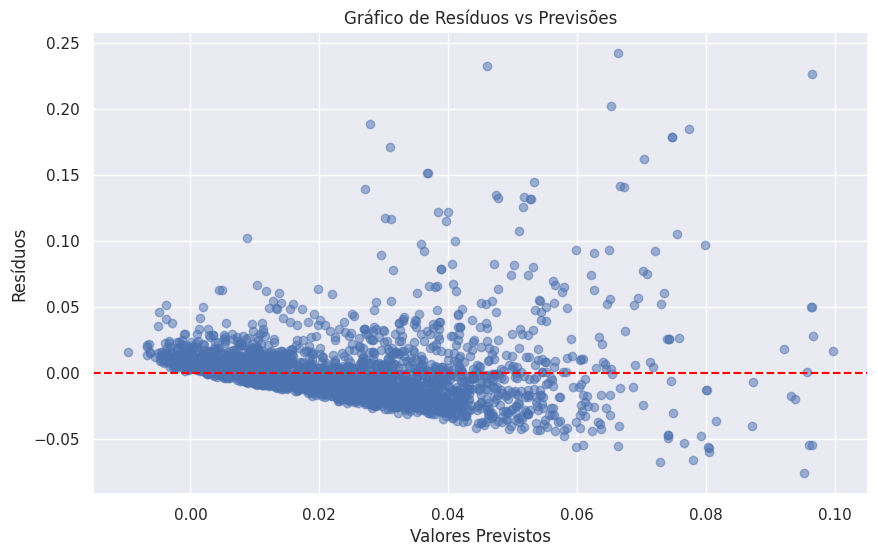

In [ ]:
# Gráfico de dispersão para visualizar a relação entre os valores previstos e os resíduos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos vs Previsões')
plt.show()

#### Análise das variáveis e seu impacto na **previsão de renda** de novos clientes:

**a)** Posse de veículo e imóvel (`posse_de_veiculo`, `posse_de_imovel`):

- Clientes que possuem veículo ou imóvel tendem a ter rendas mais altas, indicando que essas variáveis são bons indicadores de estabilidade financeira.

**b)** Tipo de renda (`tipo_renda`):

- Assalariados e servidores públicos são os grupos mais frequentes, com rendas mais estáveis. Empresários têm rendas mais variáveis, enquanto pensionistas e bolsistas tendem a ter rendas mais baixas.

**c)** Nível de educação (`educação`):

- Clientes com pós-graduação ou superior completo têm rendas mais altas, enquanto aqueles com educação primária ou secundária têm rendas mais baixas.

**d)** Estado civil e tipo de residência (`estado_civil`, `tipo_residencia`):

- Clientes casados ou que moram em casa própria tendem a ter maior estabilidade financeira, o que pode influenciar positivamente a renda.

**e)** Idade (`idade`):

- A renda aumenta com a idade até um pico (40-50 anos) e depois estabiliza ou diminui, refletindo o ciclo de vida profissional.

**f)** Tempo de emprego (tempo_emprego):

- Clientes com mais tempo de emprego tendem a ter rendas mais altas, indicando maior experiência e estabilidade no mercado de trabalho.

**g)** Quantidade de filhos (qtd_filhos):

- Clientes com mais filhos podem ter despesas mais altas, o que pode impactar sua capacidade de pagamento.

**h)** Renda (`renda`):

- A distribuição de renda é assimétrica, com a maioria dos clientes concentrados em faixas de renda mais baixas e uma cauda longa para rendas mais altas.

#### Avaliação geral do **modelo**:

**a)** Valores reais vs. Valores previstos:

- O gráfico mostrou que o modelo tem uma precisão razoável, mas há dispersão em torno da linha ideal (valor real = valor previsto), especialmente para rendas mais altas.

**b)** Distribuição dos resíduos:

- A distribuição dos resíduos está centrada em torno de zero, o que é um bom sinal. No entanto, a presença de caudas longas sugere que o modelo tem dificuldade em prever valores extremos.

**c)** Resíduos vs. Previsões:

- O gráfico mostrou que os resíduos estão distribuídos aleatoriamente, sem padrões claros, o que é positivo. No entanto, a variabilidade dos resíduos aumenta para valores previstos mais altos, indicando heterocedasticidade.

Dessa forma, o modelo demonstra uma boa capacidade de capturar a relação entre variáveis como `idade`, `tempo_emprego` e `educação` com a `renda`. Além disso, a distribuição dos resíduos centrada em zero indica que o modelo não apresenta viés sistemático. No entanto, o modelo enfrenta dificuldades para prever rendas mais altas, provavelmente em decorrência da assimetria na distribuição da renda. Adicionalmente, a heterocedasticidade nos resíduos pode comprometer a confiabilidade do modelo em determinados intervalos de renda.

## Etapa 6 Crisp-DM: Implantação

Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.